# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [45]:
import pandas as pd
import numpy as np
import random

In [46]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [51]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [52]:
# parameter 개수
N = len(X_train.loc[0])

In [53]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.91393919, 0.60945386, 0.53005879])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [54]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += np.dot(X[i],parameters[i])
    return z

## Logistic Function

## $p = \frac{1}{1+{e}^{-{X_i}^{T}\theta}}$        

In [55]:
def logistic(X,parameters):
    z = dot_product(X,parameters)
    p = 1 / (1 + np.exp(-z))     
    return p

In [56]:
logistic(X_train.iloc[1], parameters)

0.8402097337761733

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) =-\Sigma({y_i}\log p(X_i)+(1-y_i) \log(1-p(X_i)))$

In [64]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = -(y*np.log(p)+(1-y)*np.log(1-p))
    return loss

In [65]:
def mse_i(X, y, parameters):
    y_hat = np.dot(parameters.T,X)
    loss = ((y-y_hat)**2)/2
    return loss

In [66]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [67]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.3647941536568755

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\Sigma(y_i-\theta^{T}{X_i})X_{ij}$ 
## ${\partial\over{\partial \theta_j}}l(p)=-\Sigma(y_i-p_i)x_{ij} $ 

In [68]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X,parameters.T)
        gradient = (y-y_hat)*X[j]
    else:
        p = logistic(X,parameters)
        gradient = (y-p)*X[j]
    return -gradient

In [69]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.07439411250044421

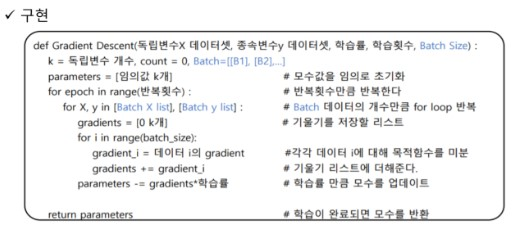

In [70]:
from IPython.display import Image

Image("배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [71]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y,parameters,j,model)
    
    return gradients

In [72]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[59.06979497596337, 9.309480988169428, 40.29072463673395]

## mini-batch
인덱스로 미니 배치 나누기

In [73]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list


batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 
batch size란 한번 기울기를 계산하여 계수를 업데이트할 때 사용하는 데이터 셋의 크기(데이터 수)를 말하며,
<br>batch_idx 함수는 전체 index 배열을 len(X_train)//batch size +1 개의 배열로 나누고<br> 각 배열의 원소(인덱스) 개수 즉 길이가 batch size가 되도록 한다.<br>
따라서 idx_list는 len(X_train) / batch size +1 개의 인덱스 배열의 리스트가 된다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [75]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    
    parameters -= gradients
    return parameters

In [76]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.91000121, 0.60883323, 0.52737274])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 모든 학습 데이터셋을 학습한 횟수 (현재 반복 횟수)
- num_epoch:에포크 횟수 (총 학습 횟수)
<br>

BGD: 한번 학습할 때, 모든 데이터셋 사용 (Batch Size = 전체 학습 데이터)<br>
SGD: 한번 학습할 때, 하나의 데이터셋만 사용 (Batch Size =1)<br>
MGD: 한번 학습할 때, batch size의 데이터셋만 사용 (Batch Size = batch_size(사용자 지정))<br>
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD <br>
batch_size=k -> MGD <br>
batch_size=whole -> BGD <br>

In [82]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function =  minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [83]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.9266162678994686  params: [0.15115826 0.29189874 0.91828096]  gradients: [0.024922370939166768, 0.008145036307745842, 0.03241421397224851]
epoch: 100  loss: 0.4784617291593289  params: [-0.84067861  0.68862142 -0.59523647]  gradients: [0.002987332232255159, -0.006946246173544782, 0.007653638114643849]
epoch: 200  loss: 0.4037407296300002  params: [-1.0183543   1.27677189 -1.19456785]  gradients: [0.0011965658767666661, -0.0049103108160717295, 0.00483718441893751]
epoch: 300  loss: 0.3679760969290939  params: [-1.11993496  1.69663665 -1.60531949]  gradients: [0.000893061810435431, -0.0036131365500744477, 0.003515418017919063]
epoch: 400  loss: 0.3476081755036082  params: [-1.20119844  2.01472629 -1.91367817]  gradients: [0.0007429707978732703, -0.0028149114859569147, 0.0027191331733739076]
epoch: 500  loss: 0.33477549665315465  params: [-1.26959279  2.26763834 -2.15728433]  gradients: [0.0006304724464269779, -0.0022810728969364794, 0.0021909487794681344]
epoch: 600  lo

array([-1.49405241,  3.04357274, -2.89603751])

In [84]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.26787550000501775  params: [-0.91119293  1.15814276 -1.27826664]  gradients: [0.024290884625362098, 0.013219122646578025, 0.01709084153228358]
epoch: 100  loss: 0.07736668165924102  params: [-1.93032602  4.17502049 -4.06769203]  gradients: [0.0075385402817469555, 0.004102480831699902, 0.005304047148844956]
epoch: 200  loss: 0.07736266551886703  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159521551376, 0.0041022736216372825, 0.005303779249496505]
epoch: 300  loss: 0.07736266518361704  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767116, 0.0041022736043402576, 0.0053037792271333935]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  los

array([-1.9303681 ,  4.17514311, -4.06780375])

In [85]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 1.287195588814827  params: [0.56384952 0.0630246  0.55163654]  gradients: [0.060084806061567554, 0.0534995733982173, 0.06955682944550234]
epoch: 100  loss: 0.2000231589215126  params: [-1.55121298  3.03782129 -2.98699254]  gradients: [0.007437686191680074, 0.010934916723135863, 0.01460310124122288]
epoch: 200  loss: 0.16855637837150908  params: [-1.76969938  3.73400801 -3.64448936]  gradients: [0.00697752349016541, 0.010567480376661853, 0.013092014363448668]
epoch: 300  loss: 0.15742732409894375  params: [-1.86639987  4.03659094 -3.92770909]  gradients: [0.006857222792070241, 0.010446772970929585, 0.012563437920299993]
epoch: 400  loss: 0.15233833435792485  params: [-1.91518968  4.18837904 -4.06922893]  gradients: [0.006810247313215284, 0.010393392064156922, 0.012322930039449023]
epoch: 500  loss: 0.14975846023802847  params: [-1.94118294  4.26903872 -4.14428514]  gradients: [0.006788383875640682, 0.010366756419377393, 0.012201292196804204]
epoch: 600  loss: 0.148384086

array([-1.97154572,  4.3630903 , -4.2316763 ])

### Predict Label

In [86]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [87]:
from sklearn.metrics import *

In [88]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [89]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [94]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [95]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [96]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.73175054, 2.37638354])

In [97]:
#경사하강법
new_param = gradient_descent(X, y, model='linear')
new_param

epoch: 0  loss: 0.2711388671753115  params: [1.32751908 0.87718908]  gradients: [-0.009307659238484603, -0.014894772555164302]
epoch: 100  loss: 0.22637890267764446  params: [0.72845457 2.31504898]  gradients: [0.02487441249171776, 0.018656350034396495]
epoch: 200  loss: 0.22650590379975455  params: [0.72769739 2.31642822]  gradients: [0.024886017566577122, 0.018675368074350097]
epoch: 300  loss: 0.22650603292230362  params: [0.72769662 2.31642962]  gradients: [0.024886029349710487, 0.018675387384186858]
epoch: 400  loss: 0.2265060330534071  params: [0.72769662 2.31642962]  gradients: [0.024886029361674358, 0.01867538740379292]
epoch: 500  loss: 0.22650603305354025  params: [0.72769662 2.31642962]  gradients: [0.0248860293616865, 0.018675387403812804]
epoch: 600  loss: 0.22650603305354025  params: [0.72769662 2.31642962]  gradients: [0.0248860293616865, 0.018675387403812804]
epoch: 700  loss: 0.22650603305354025  params: [0.72769662 2.31642962]  gradients: [0.0248860293616865, 0.018675

array([0.72769662, 2.31642962])

In [98]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

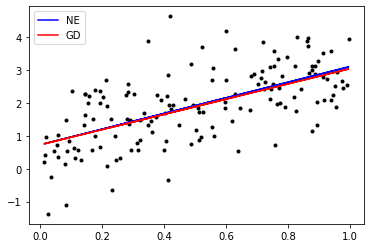

In [99]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()